# Tutorial for using `align_represenatations.py` 

In [59]:
import os, sys
sys.path.append(os.path.join(os.getcwd(), '../'))

import numpy as np
import pandas as pd
import pickle as pkl

from src.align_representations import Representation, AlignRepresentations, OptimizationConfig, VisualizationConfig

## Load data
you can choose the following data
1. 'DNN': representations of 2000 imagenet images in AlexNet and VGG19
1. 'color': human similarity judgements of 93 colors for 5 paricipants groups
1. 'face': human similarity judgements of 16 faces, attended vs unattended condition in the same participant
1. 'THINGS' : human similarity judgements of 1854 objects for 4 paricipants groups


"data_select" in next code block can define which dataset are going to be used.

In [46]:
# data_select = "THINGS"
data_select = "color"

##### set some parameters used later...

In [47]:
'''
Set Representations
    - A Representation needs a name and either an embedding or a similarity matrix.
'''
# Parameters
n_representations = 4 # Set the number of representations. This number must be equal to or less than the number of groups.
metric = "euclidean"

# representations list that will be used in Align_Representations
representations = list()

### Dataset No1. `color`

In [48]:
# Load data and create representations instance
if data_select == 'color':
    category_mat = None
    data_path = '../data/num_groups_5_seed_0_fill_val_3.5.pickle'
    with open(data_path, "rb") as f:
        data = pkl.load(f)
    sim_mat_list = data["group_ave_mat"]
    for i in range(n_representations):
        name = f"Group{i+1}"
        sim_mat = sim_mat_list[i]
        representation = Representation(name = name, sim_mat = sim_mat)
        representations.append(representation)
    


### Dataset No.2 `THINGS`

In [49]:
if data_select == "THINGS":
    # define the label information of the dataset
    category_mat = pd.read_csv("../data/category_mat_manual_preprocessed.csv", sep = ",", index_col = 0)
    
    # define the parameters for label info. 
    # Users can define these by themselves if they use a different dataset and the format of parameters are the same.
    from src.utils.utils_functions import get_category_data, sort_matrix_with_categories
    object_labels, category_idx_list, num_category_list, category_name_list = get_category_data(category_mat)
    
    for i in range(n_representations):
        name = f"Group{i+1}"
        embedding = np.load(f"../data/THINGS_embedding_Group{i+1}.npy")[0]
        
        representation = Representation(
            name = name, 
            embedding = embedding, 
            metric = metric, 
            object_labels = object_labels,
            category_name_list = category_name_list,
            category_idx_list = category_idx_list,
            num_category_list = num_category_list,
            func_for_sort_sim_mat = sort_matrix_with_categories
        )
        
        representations.append(representation)

## Set the parameters for the optimazation of GWOT, and the parameters for visualizing matrices

In [50]:
eps_list = [0.02, 0.2] # [1, 10] for THINGS data, [0.02, 0.2] for colors data

config = OptimizationConfig(
    data_name = data_select, 
    delete_study = False, 
    device = 'cpu',
    to_types = 'numpy',
    n_jobs = 1,
    init_plans_list = ['random'],
    num_trial = 10,
    n_iter = 1,
    max_iter = 200,
    sampler_name = 'tpe',
    eps_list = eps_list,
    eps_log = True,
    pruner_name = 'hyperband',
    pruner_params = {'n_startup_trials': 1, 
                     'n_warmup_steps': 2, 
                     'min_resource': 2, 
                     'reduction_factor' : 3
                    }
)


## Unsupervised alignment between Representations
    - The object has methods for RSA, GW-alignment, evaluation of the alignment and visalization of aligned embeddings.
    - The parameter "shuffle" means a method is applied for a shuffled similarity matrix.

Pair number 0 : Group1 vs Group2


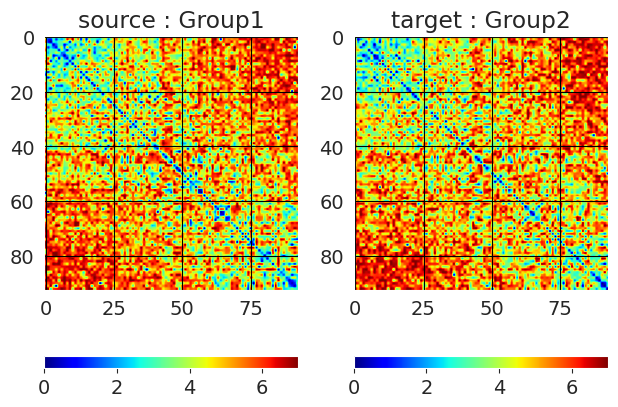

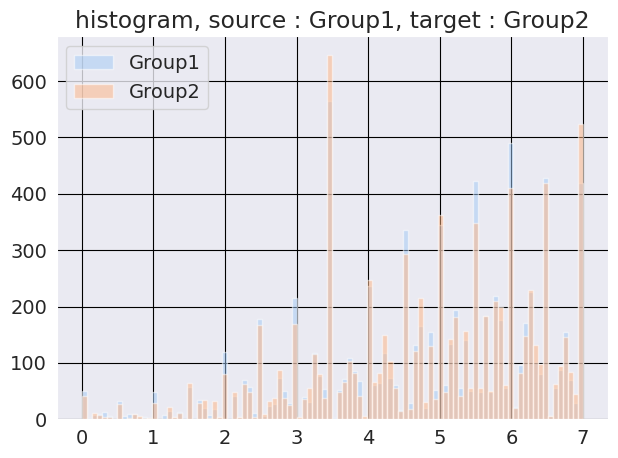

Pair number 1 : Group1 vs Group3


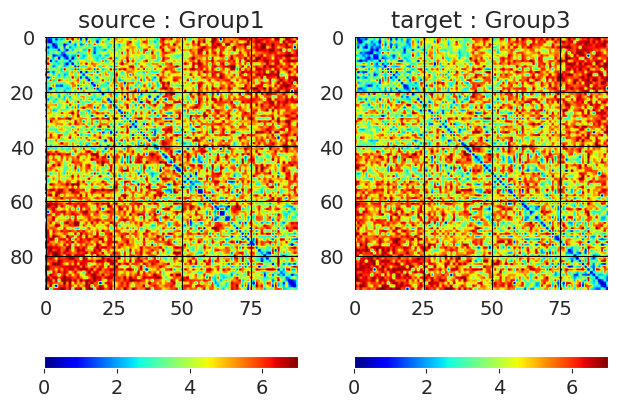

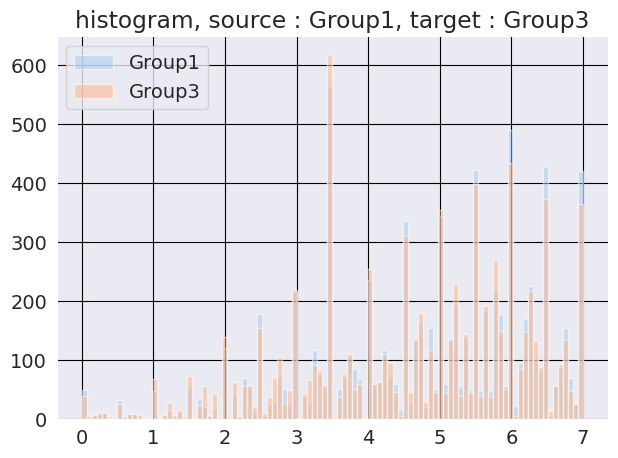

Pair number 2 : Group1 vs Group4


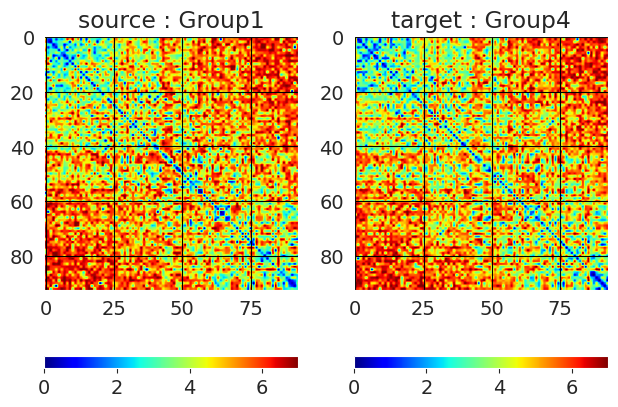

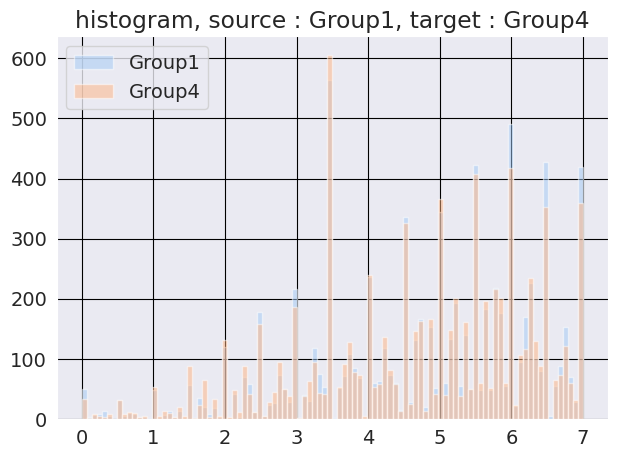

Pair number 3 : Group2 vs Group3


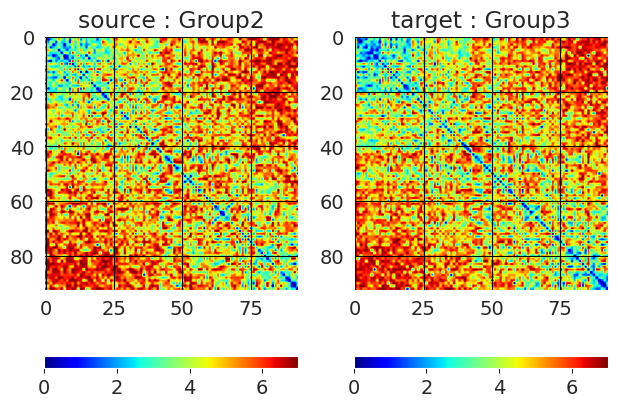

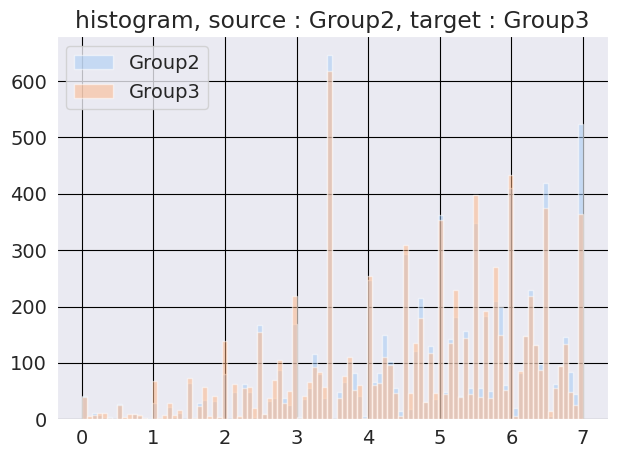

Pair number 4 : Group2 vs Group4


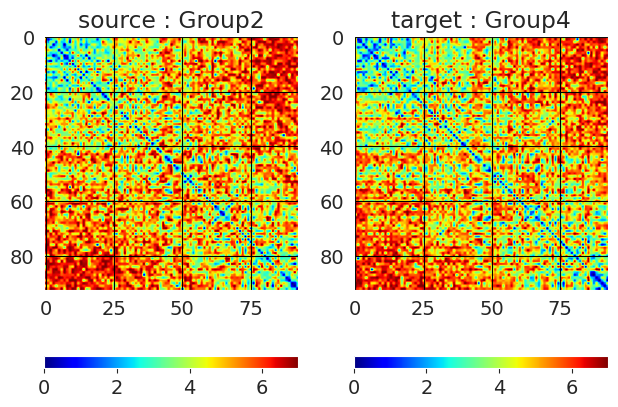

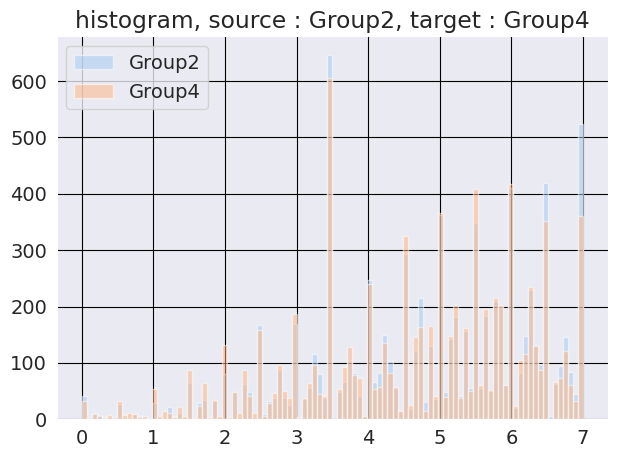

Pair number 5 : Group3 vs Group4


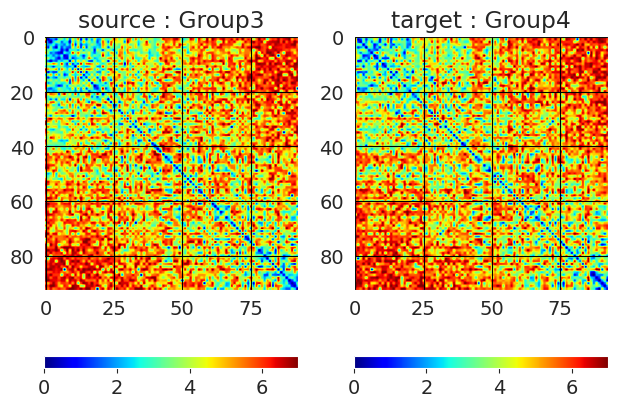

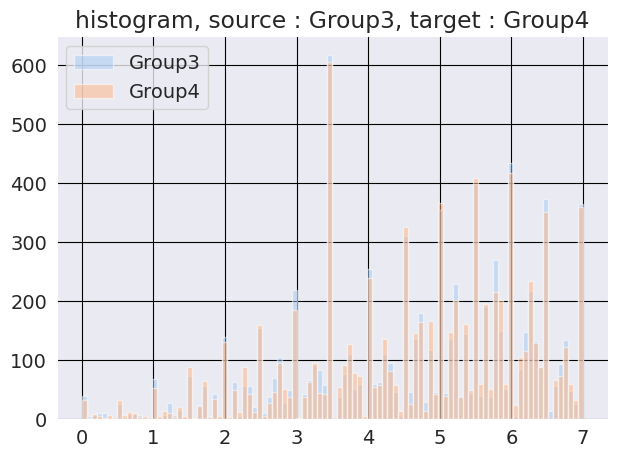

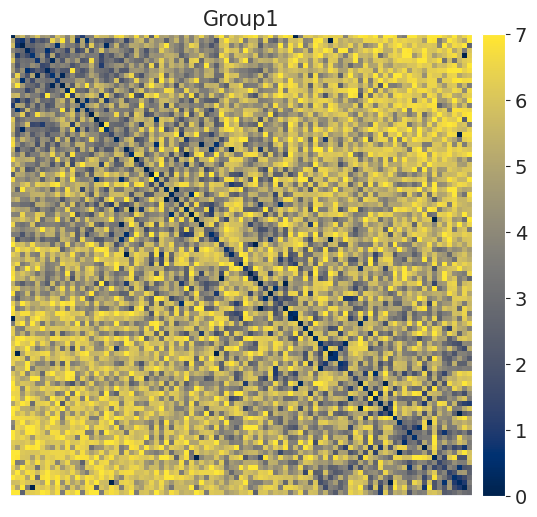

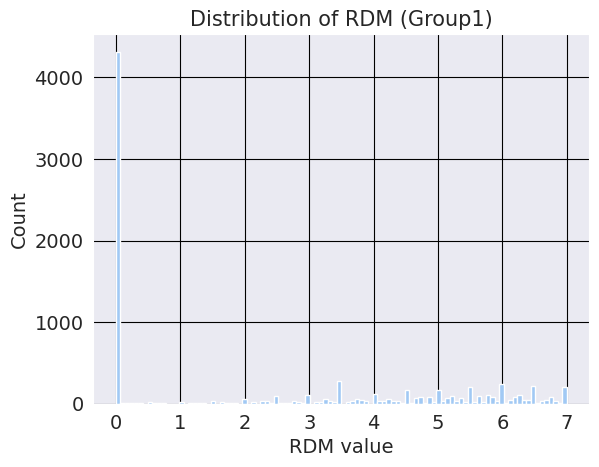

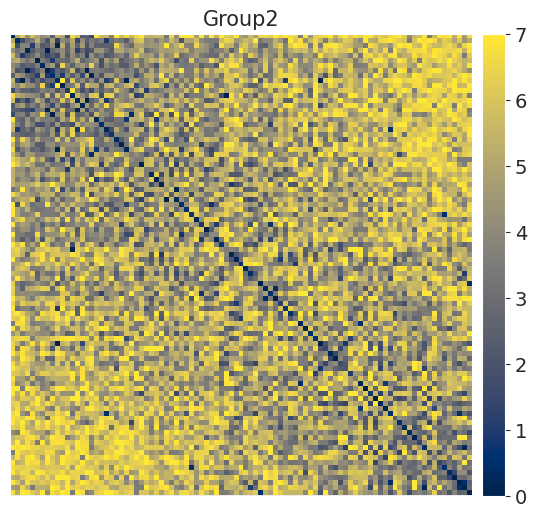

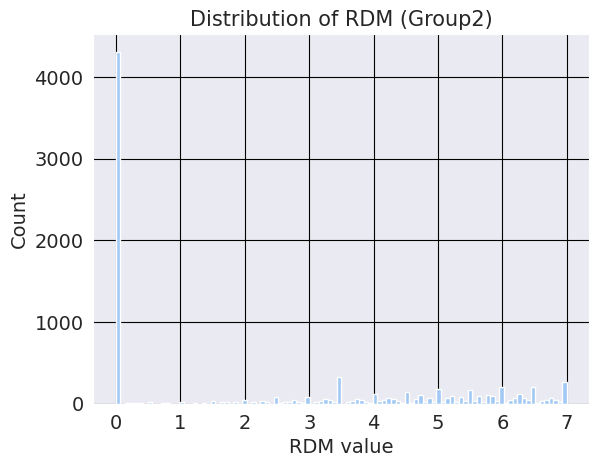

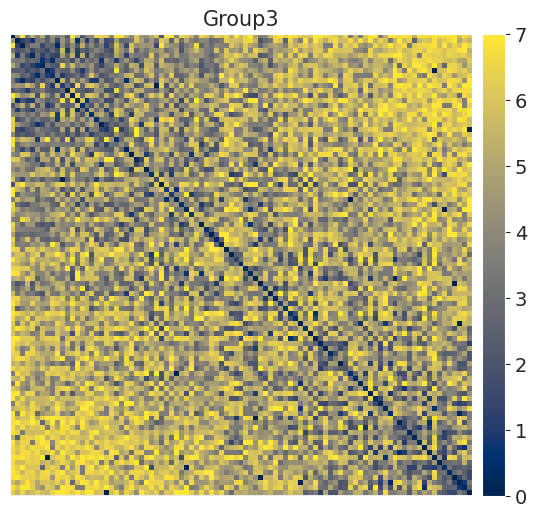

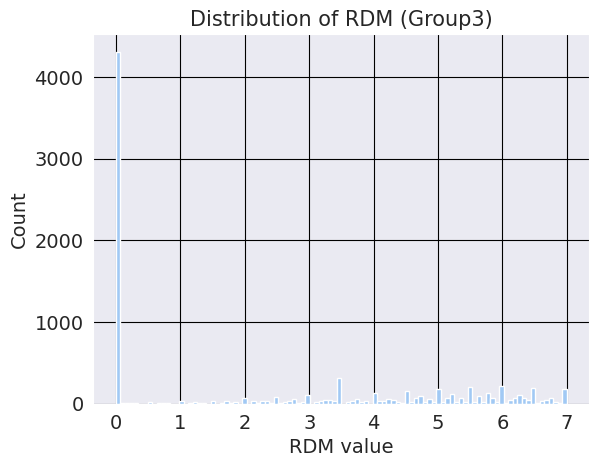

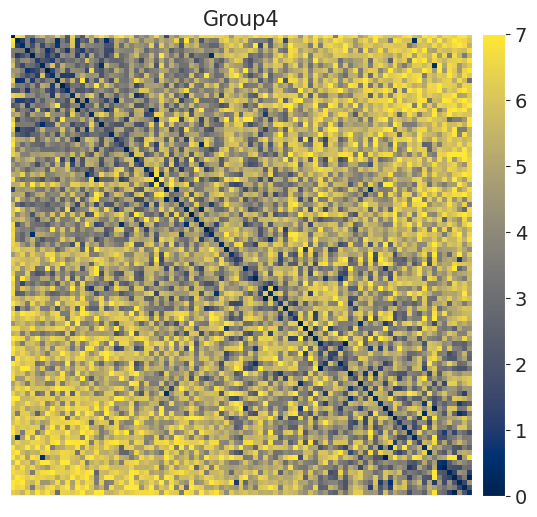

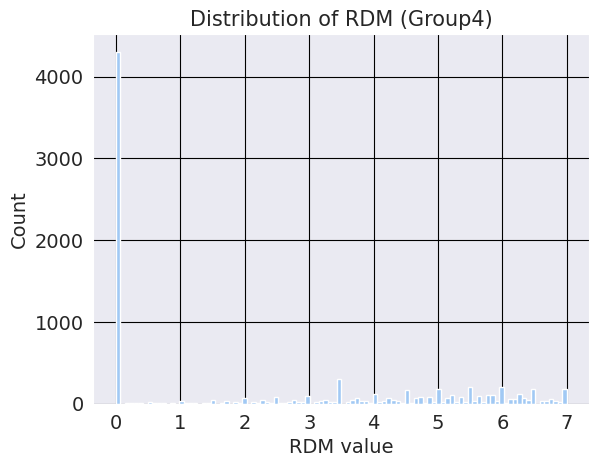

In [51]:

# Set the instance
align_representation = AlignRepresentations(representations_list = representations, config = config)

# RSA
if data_select == "THINGS":
    sim_mat_format = "sorted"
    visualize_matrix = VisualizationConfig(figsize=(8, 6), title_size = 15, category_line_alpha = 0.5, draw_category_line=True)
    sim_mat = align_representation.show_sim_mat(
        sim_mat_format = sim_mat_format, 
        visualization_config = visualize_matrix,
        ticks='category'
    )

if data_select == "color":
    sim_mat_format = "default"
    visualize_matrix = VisualizationConfig(figsize=(8, 6), title_size = 15)
    sim_mat = align_representation.show_sim_mat(
        sim_mat_format = sim_mat_format, 
        visualization_config = visualize_matrix,
    )
    

In [52]:
align_representation.RSA_get_corr(method = 'all')

Correlation Group1 vs Group2 : 0.5483465814790893
Correlation Group1 vs Group3 : 0.5748669754743746
Correlation Group1 vs Group4 : 0.574388974670536
Correlation Group2 vs Group3 : 0.5843098666648006
Correlation Group2 vs Group4 : 0.5725330793177039
Correlation Group3 vs Group4 : 0.6115585713527559


## Computing GW Alignment.

  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:13:09,324] Trial 10 finished with value: 1.8484509198493584 and parameters: {'eps': 0.023475585414180013, 'initialize': 'random'}. Best is trial 10 with value: 1.8484509198493584.


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:13:18,866] Trial 11 finished with value: 2.0446806637888386 and parameters: {'eps': 0.020153068054663992, 'initialize': 'random'}. Best is trial 10 with value: 1.8484509198493584.


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:13:28,132] Trial 12 finished with value: 2.389191272695024 and parameters: {'eps': 0.020350604538597647, 'initialize': 'random'}. Best is trial 10 with value: 1.8484509198493584.


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:13:37,292] Trial 13 finished with value: 2.029683087985847 and parameters: {'eps': 0.020243338048769852, 'initialize': 'random'}. Best is trial 10 with value: 1.8484509198493584.


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:13:45,647] Trial 14 finished with value: 1.9045532515723091 and parameters: {'eps': 0.027938869859682542, 'initialize': 'random'}. Best is trial 10 with value: 1.8484509198493584.


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:13:54,715] Trial 15 finished with value: 2.208932949642201 and parameters: {'eps': 0.030442448346252392, 'initialize': 'random'}. Best is trial 10 with value: 1.8484509198493584.


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:14:02,617] Trial 16 finished with value: 1.9601888603403135 and parameters: {'eps': 0.03246308621537107, 'initialize': 'random'}. Best is trial 10 with value: 1.8484509198493584.


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:14:11,422] Trial 17 finished with value: 1.9828402309283653 and parameters: {'eps': 0.03382328833868015, 'initialize': 'random'}. Best is trial 10 with value: 1.8484509198493584.


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:14:19,962] Trial 18 finished with value: 1.8626521469397248 and parameters: {'eps': 0.043233975477512156, 'initialize': 'random'}. Best is trial 10 with value: 1.8484509198493584.


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:14:30,254] Trial 19 finished with value: 2.4693949823830654 and parameters: {'eps': 0.047932958930972595, 'initialize': 'random'}. Best is trial 10 with value: 1.8484509198493584.


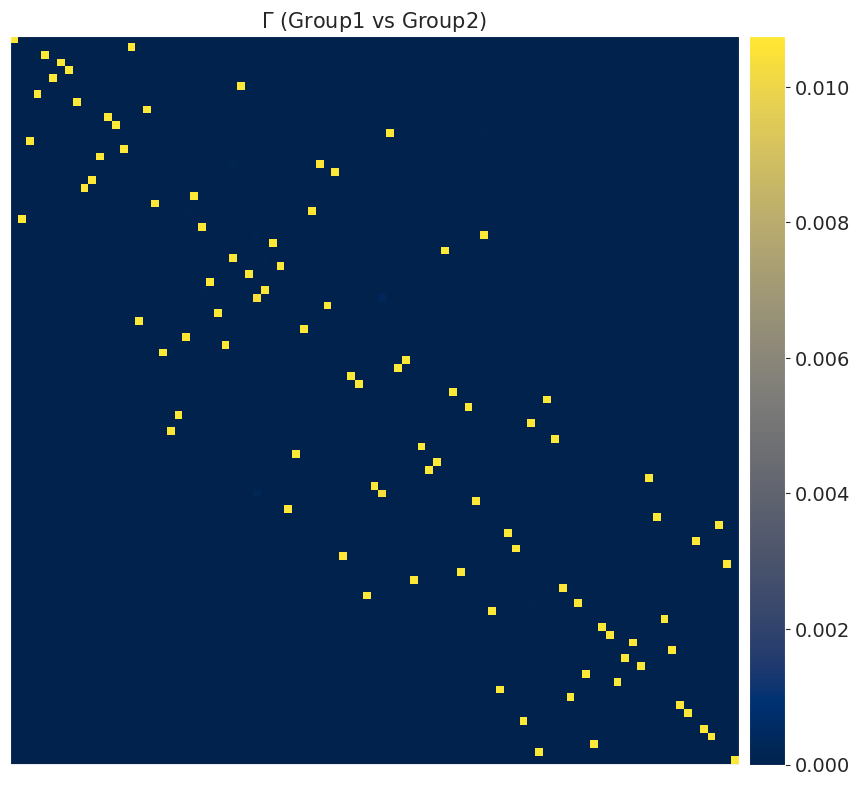

  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:14:39,538] Trial 10 finished with value: 2.077313838419082 and parameters: {'eps': 0.023475585414180013, 'initialize': 'random'}. Best is trial 10 with value: 2.077313838419082.


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:14:48,477] Trial 11 finished with value: 2.089706601135629 and parameters: {'eps': 0.020153068054663992, 'initialize': 'random'}. Best is trial 10 with value: 2.077313838419082.


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:14:58,454] Trial 12 finished with value: 1.769169734941515 and parameters: {'eps': 0.020350604538597647, 'initialize': 'random'}. Best is trial 12 with value: 1.769169734941515.


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:15:05,700] Trial 13 finished with value: 1.7581351698109662 and parameters: {'eps': 0.02024665830512174, 'initialize': 'random'}. Best is trial 13 with value: 1.7581351698109662.


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:15:08,015] Trial 14 finished with value: 1.8156172801768131 and parameters: {'eps': 0.02810115314147218, 'initialize': 'random'}. Best is trial 13 with value: 1.7581351698109662.


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:15:10,916] Trial 15 finished with value: 1.8701298936591566 and parameters: {'eps': 0.03192359538953862, 'initialize': 'random'}. Best is trial 13 with value: 1.7581351698109662.


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:15:19,318] Trial 16 finished with value: 2.0355906667102803 and parameters: {'eps': 0.03601417366216906, 'initialize': 'random'}. Best is trial 13 with value: 1.7581351698109662.


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:15:28,176] Trial 17 finished with value: 2.0669782411238438 and parameters: {'eps': 0.04230483384163372, 'initialize': 'random'}. Best is trial 13 with value: 1.7581351698109662.


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:15:37,170] Trial 18 finished with value: 2.1506127677786577 and parameters: {'eps': 0.021649339524116365, 'initialize': 'random'}. Best is trial 13 with value: 1.7581351698109662.


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:15:46,585] Trial 19 finished with value: 1.7282020127201736 and parameters: {'eps': 0.026704408799977142, 'initialize': 'random'}. Best is trial 19 with value: 1.7282020127201736.


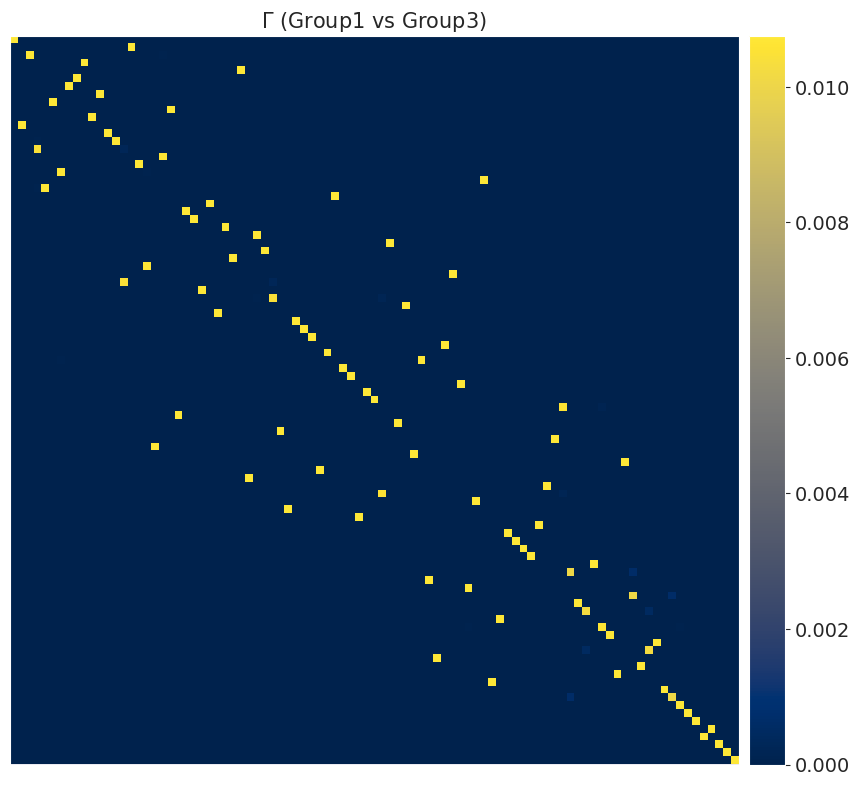

  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:15:56,675] Trial 10 finished with value: 2.114243143393744 and parameters: {'eps': 0.023475585414180013, 'initialize': 'random'}. Best is trial 10 with value: 2.114243143393744.


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:16:06,455] Trial 11 finished with value: 1.8747948137205963 and parameters: {'eps': 0.020153068054663992, 'initialize': 'random'}. Best is trial 11 with value: 1.8747948137205963.


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:16:14,769] Trial 12 finished with value: 1.8885735107974595 and parameters: {'eps': 0.020350604538597647, 'initialize': 'random'}. Best is trial 11 with value: 1.8747948137205963.


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:16:24,508] Trial 13 finished with value: 1.9224634556150777 and parameters: {'eps': 0.02046182269920792, 'initialize': 'random'}. Best is trial 11 with value: 1.8747948137205963.


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:16:33,834] Trial 14 finished with value: 1.878163238730155 and parameters: {'eps': 0.028972000365168178, 'initialize': 'random'}. Best is trial 11 with value: 1.8747948137205963.


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:16:44,350] Trial 15 finished with value: 1.728976125796073 and parameters: {'eps': 0.029880541802562773, 'initialize': 'random'}. Best is trial 15 with value: 1.728976125796073.


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:16:53,177] Trial 16 finished with value: 2.1235416795834268 and parameters: {'eps': 0.03250632199304012, 'initialize': 'random'}. Best is trial 15 with value: 1.728976125796073.


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:17:03,158] Trial 17 finished with value: 2.0292149341497976 and parameters: {'eps': 0.037287454712849104, 'initialize': 'random'}. Best is trial 15 with value: 1.728976125796073.


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:17:06,281] Trial 18 finished with value: 2.3967545926500344 and parameters: {'eps': 0.043233975477512156, 'initialize': 'random'}. Best is trial 15 with value: 1.728976125796073.


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:17:15,431] Trial 19 finished with value: 1.7103528591323336 and parameters: {'eps': 0.026704408799977142, 'initialize': 'random'}. Best is trial 19 with value: 1.7103528591323336.


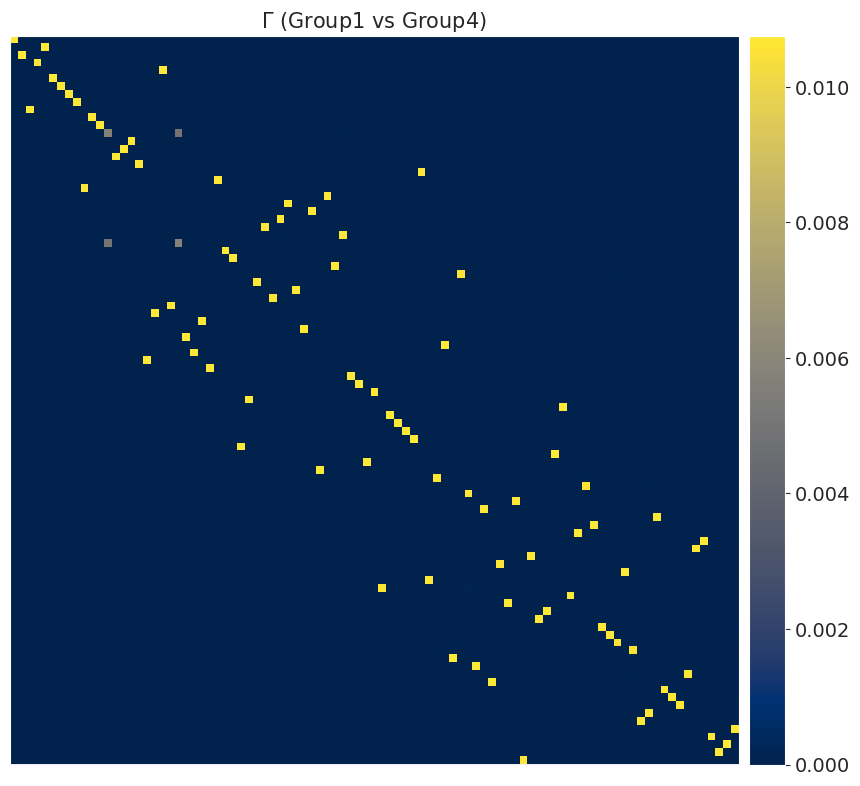

  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:17:19,920] Trial 6 finished with value: 1.918965463371085 and parameters: {'eps': 0.047377279007281566, 'initialize': 'random'}. Best is trial 6 with value: 1.918965463371085.


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:17:28,295] Trial 7 finished with value: 1.7216222109166406 and parameters: {'eps': 0.1785436060870726, 'initialize': 'random'}. Best is trial 7 with value: 1.7216222109166406.


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:17:34,776] Trial 8 finished with value: 1.9329168889544963 and parameters: {'eps': 0.10790061933340454, 'initialize': 'random'}. Best is trial 7 with value: 1.7216222109166406.


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:17:40,179] Trial 9 finished with value: 1.8815806057621076 and parameters: {'eps': 0.07937586660888747, 'initialize': 'random'}. Best is trial 7 with value: 1.7216222109166406.


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:17:49,630] Trial 10 finished with value: 2.0314906418104224 and parameters: {'eps': 0.0286449874364605, 'initialize': 'random'}. Best is trial 7 with value: 1.7216222109166406.


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:17:58,308] Trial 11 finished with value: 1.6519094046947116 and parameters: {'eps': 0.1251372158746818, 'initialize': 'random'}. Best is trial 11 with value: 1.6519094046947116.


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:18:08,292] Trial 12 finished with value: 1.849949048079027 and parameters: {'eps': 0.12885887661273873, 'initialize': 'random'}. Best is trial 11 with value: 1.6519094046947116.


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:18:15,542] Trial 13 finished with value: 1.892429244891236 and parameters: {'eps': 0.13099862571202237, 'initialize': 'random'}. Best is trial 11 with value: 1.6519094046947116.


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:18:24,426] Trial 14 finished with value: 1.6503755556193602 and parameters: {'eps': 0.1333874869942054, 'initialize': 'random'}. Best is trial 14 with value: 1.6503755556193602.


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:18:32,954] Trial 15 finished with value: 1.6573269865357463 and parameters: {'eps': 0.08972150428910768, 'initialize': 'random'}. Best is trial 14 with value: 1.6503755556193602.


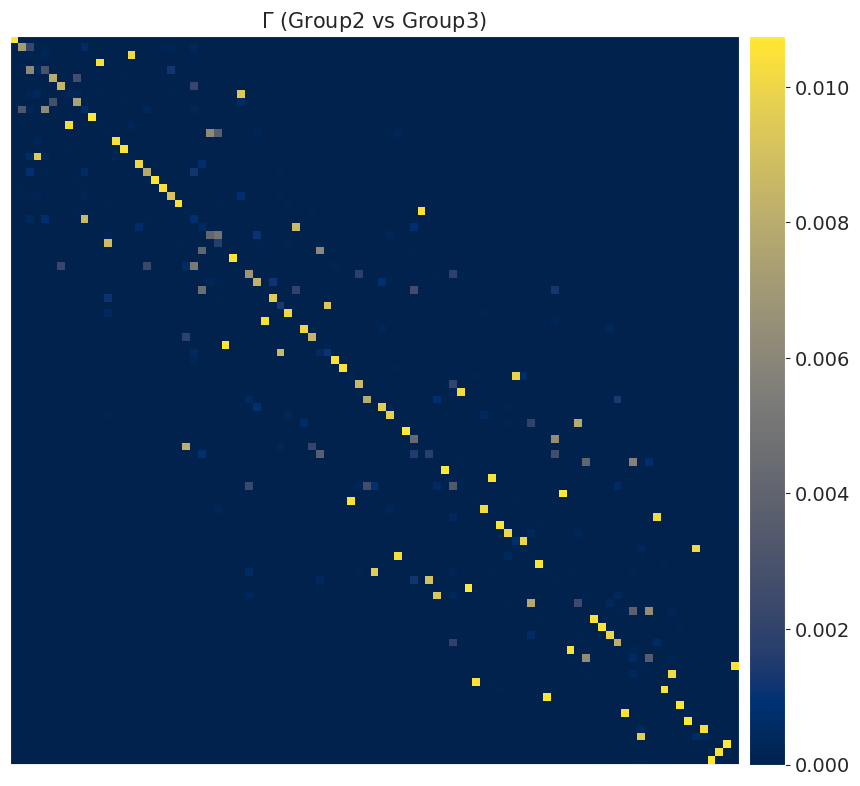

  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:18:42,555] Trial 2 finished with value: 1.7073791341491602 and parameters: {'eps': 0.047377279007281566, 'initialize': 'random'}. Best is trial 2 with value: 1.7073791341491602.


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:18:51,873] Trial 3 finished with value: 1.9497425299214712 and parameters: {'eps': 0.1785436060870726, 'initialize': 'random'}. Best is trial 2 with value: 1.7073791341491602.


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:18:58,537] Trial 4 finished with value: 1.6102708595360065 and parameters: {'eps': 0.10790061933340454, 'initialize': 'random'}. Best is trial 4 with value: 1.6102708595360065.


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:19:07,701] Trial 5 finished with value: 1.5951185748618768 and parameters: {'eps': 0.07937586660888747, 'initialize': 'random'}. Best is trial 5 with value: 1.5951185748618768.


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:19:10,294] Trial 6 finished with value: 2.1686617325767217 and parameters: {'eps': 0.0286449874364605, 'initialize': 'random'}. Best is trial 5 with value: 1.5951185748618768.


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:19:19,942] Trial 7 finished with value: 2.1697334885564223 and parameters: {'eps': 0.02864339657822303, 'initialize': 'random'}. Best is trial 5 with value: 1.5951185748618768.


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:19:30,089] Trial 8 finished with value: 2.0120664300563833 and parameters: {'eps': 0.022861967752626437, 'initialize': 'random'}. Best is trial 5 with value: 1.5951185748618768.


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:19:38,031] Trial 9 finished with value: 1.6439109702039147 and parameters: {'eps': 0.146962368105409, 'initialize': 'random'}. Best is trial 5 with value: 1.5951185748618768.


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:19:46,729] Trial 10 finished with value: 1.9083543918723263 and parameters: {'eps': 0.0798261175712336, 'initialize': 'random'}. Best is trial 5 with value: 1.5951185748618768.


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:19:55,749] Trial 11 finished with value: 1.823703317129713 and parameters: {'eps': 0.07608857558288276, 'initialize': 'random'}. Best is trial 5 with value: 1.5951185748618768.


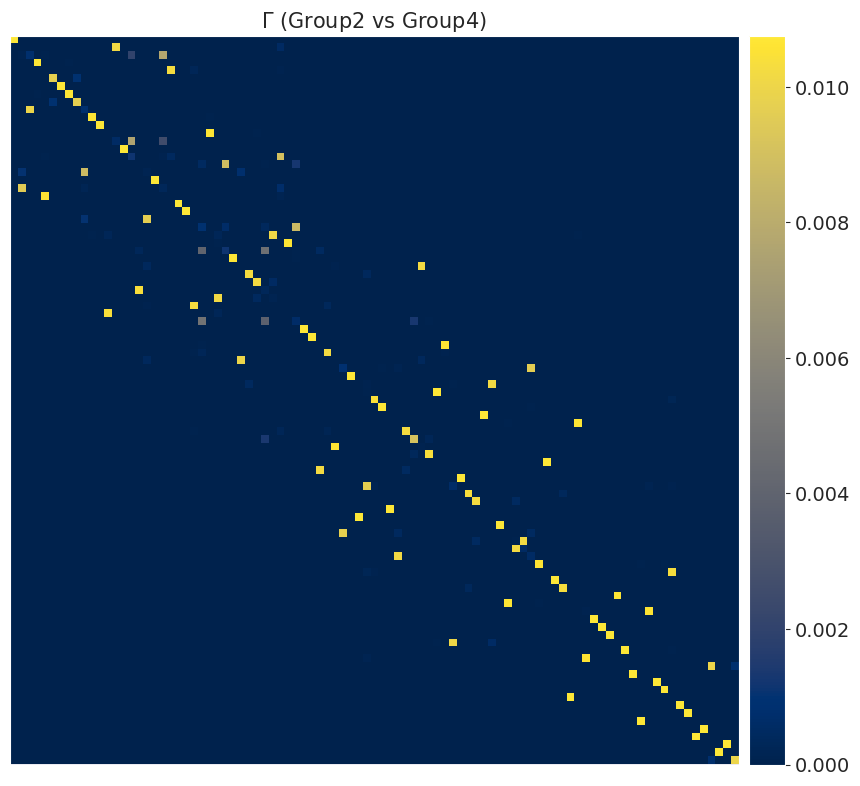

[I 2023-06-10 20:19:56,170] A new study created in RDB with name: color Group3 vs Group4


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:20:04,903] Trial 0 finished with value: 1.6968864753362112 and parameters: {'eps': 0.047377279007281566, 'initialize': 'random'}. Best is trial 0 with value: 1.6968864753362112.


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:20:13,710] Trial 1 finished with value: 1.601945739691877 and parameters: {'eps': 0.1785436060870726, 'initialize': 'random'}. Best is trial 1 with value: 1.601945739691877.


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:20:21,948] Trial 2 finished with value: 1.5541310497348357 and parameters: {'eps': 0.10790061933340454, 'initialize': 'random'}. Best is trial 2 with value: 1.5541310497348357.


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:20:30,356] Trial 3 finished with value: 1.6899486791194112 and parameters: {'eps': 0.07937586660888747, 'initialize': 'random'}. Best is trial 2 with value: 1.5541310497348357.


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:20:38,986] Trial 4 finished with value: 1.7207452632537872 and parameters: {'eps': 0.0286449874364605, 'initialize': 'random'}. Best is trial 2 with value: 1.5541310497348357.


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:20:41,402] Trial 5 finished with value: 1.5202430490624566 and parameters: {'eps': 0.02864339657822303, 'initialize': 'random'}. Best is trial 5 with value: 1.5202430490624566.


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:20:50,556] Trial 6 finished with value: 1.9374419376763559 and parameters: {'eps': 0.022861967752626437, 'initialize': 'random'}. Best is trial 5 with value: 1.5202430490624566.


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:20:58,978] Trial 7 finished with value: 1.794421623376717 and parameters: {'eps': 0.146962368105409, 'initialize': 'random'}. Best is trial 5 with value: 1.5202430490624566.


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:21:06,016] Trial 8 finished with value: 1.5716822762434721 and parameters: {'eps': 0.0798261175712336, 'initialize': 'random'}. Best is trial 5 with value: 1.5202430490624566.


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2023-06-10 20:21:15,516] Trial 9 finished with value: 1.536170671124842 and parameters: {'eps': 0.10211806418789517, 'initialize': 'random'}. Best is trial 5 with value: 1.5202430490624566.


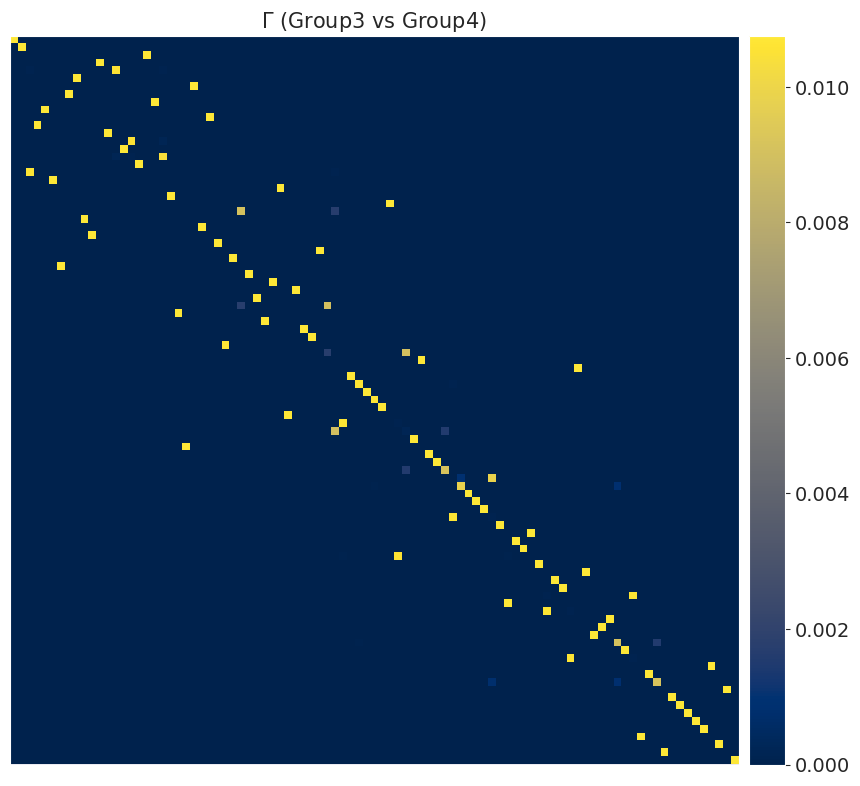

In [54]:
if data_select == "THINGS":
    sim_mat_format = "sorted"
    visualize_matrix = VisualizationConfig(figsize=(8, 6), title_size = 15, category_line_color = 'C1')

    ot_list = align_representation.gw_alignment(
        results_dir = "../results",
        compute_again = True,  # If the computation was done and no need for, turn "compute_again" False, then OT plans calculated before is loaded.
        return_data = False,
        return_figure = True,
        OT_format = sim_mat_format, 
        visualization_config = visualize_matrix,
        ticks = 'category', # you can use "objects" or "category" or "None"
        use_parallel=True, # both for numpy and torch. the parallel computation is done by "ThreadPoolExecutor" from "concurrent" by Python.
        multi_gpu="False",
        # multi_gpu=[1,2], # "True" : all the GPU installed in your environment, "list (e.g.[0,2,3])"" : cuda:0,2,3, and "False" : single gpu (or cpu for numpy) will use for parallel computation.
    )

if data_select == "color":
    visualize_matrix = VisualizationConfig(figsize=(10, 10), title_size = 15)

    align_representation.gw_alignment(
        results_dir = "../results",
        compute_again = True,
        return_data = False,
        return_figure = True,
        OT_format = sim_mat_format, # "default"
        visualization_config = visualize_matrix,
    )

## Align embeddings with OT plans and Visualize the aligned embeddings

Top k accuracy : 
        Group1 vs Group2  Group1 vs Group3  Group1 vs Group4  Group2 vs Group3  \
top_n                                                                           
1             26.881720         39.784946         35.483871         41.935484   
5             63.440860         75.268817         83.870968         86.021505   
10            88.172043         92.473118         98.924731         97.849462   

       Group2 vs Group4  Group3 vs Group4  
top_n                                      
1             43.010753         47.311828  
5             89.247312         90.322581  
10            96.774194        100.000000  
Mean : 
 top_n
1     41.505376
5     84.946237
10    97.204301
dtype: float64


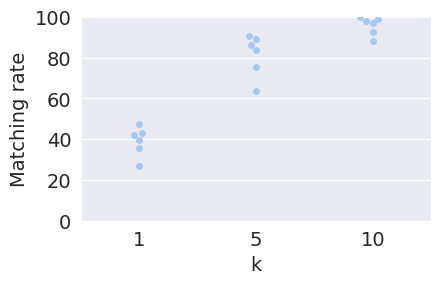

In [55]:
## Calculate the accuracy of the optimized OT matrix
align_representation.calc_accuracy(top_k_list = [1, 5, 10], eval_type = "ot_plan")
align_representation.plot_accuracy(eval_type = "ot_plan", scatter = True)

K nearest matching rate : 
        Group1 vs Group2  Group1 vs Group3  Group1 vs Group4  Group2 vs Group3  \
top_n                                                                           
1             41.935484         44.086022         46.236559         58.064516   
5             87.096774         88.172043         88.172043         95.698925   
10            93.548387         94.623656         96.774194        100.000000   

       Group2 vs Group4  Group3 vs Group4  
top_n                                      
1             50.537634         51.612903  
5             92.473118         93.548387  
10            97.849462         97.849462  
Mean : 
 top_n
1     50.107527
5     91.612903
10    97.419355
dtype: float64


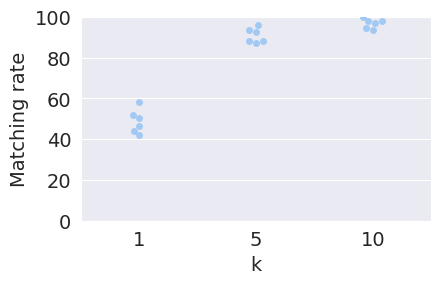

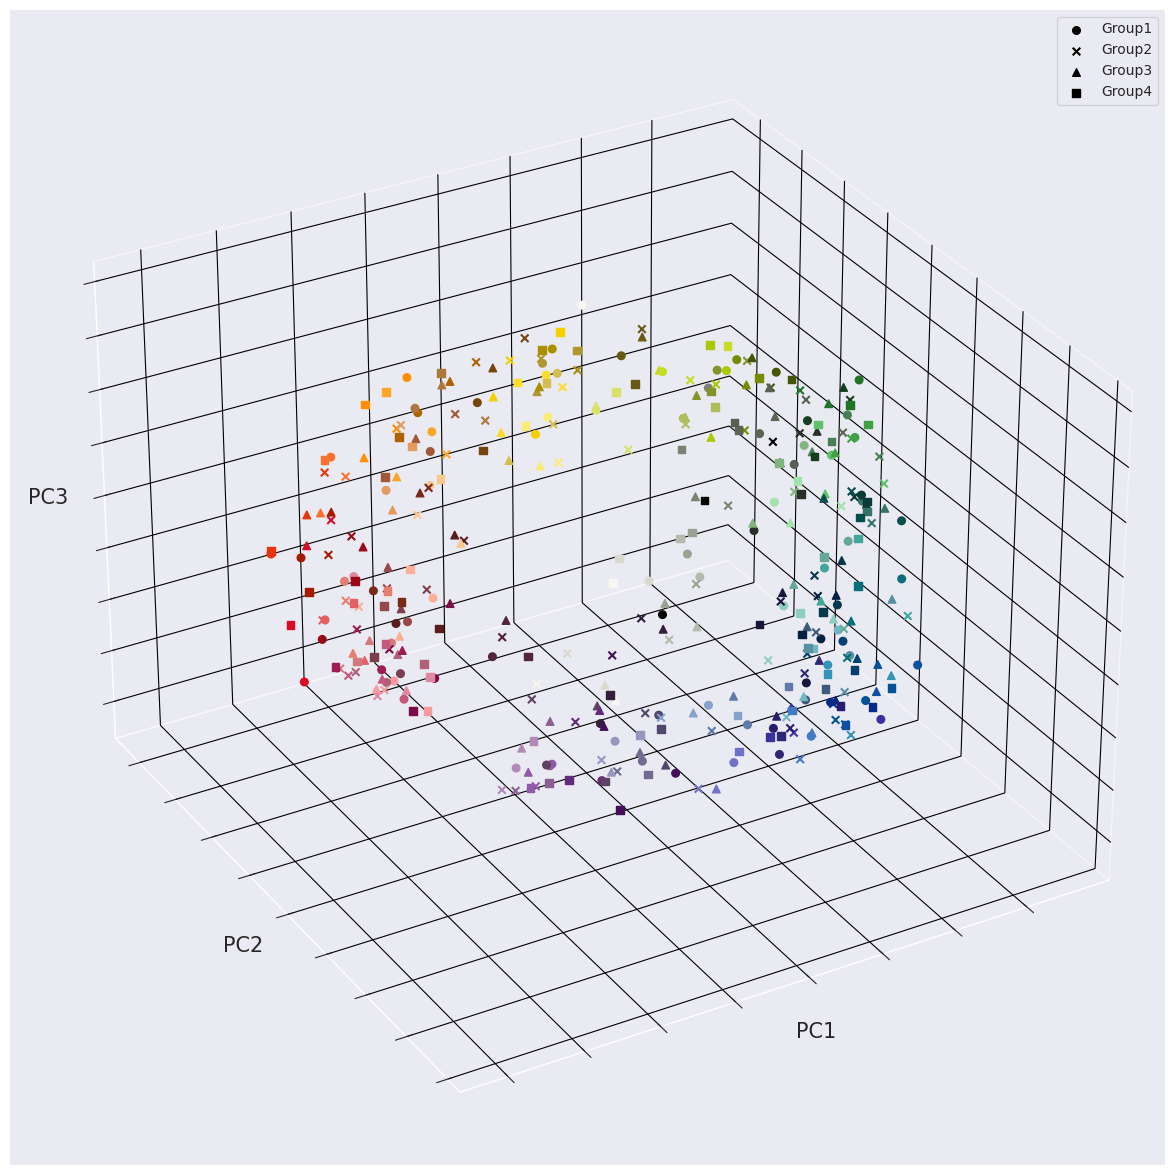

In [60]:
## Calculate the matching rate of k-nearest neighbors of embeddings
## Matching rate of k-nearest neighbors 
align_representation.calc_accuracy(top_k_list = [1, 5, 10], eval_type = "k_nearest")
align_representation.plot_accuracy(eval_type = "k_nearest", scatter = True)


if data_select == 'color':
    file_path = "../data/color_dict.csv"
    data_color = pd.read_csv(file_path)
    color_labels = data_color.columns.values
    visualization_config = VisualizationConfig(color_labels = color_labels, figsize = (15, 15), xlabel = "PC1", ylabel = "PC2", zlabel = "PC3", legend_size = 10)
    align_representation.visualize_embedding(dim = 3, visualization_config = visualization_config)

## category level analysis 
User can use this analysis if the dataset has category info.

In [ ]:
## Calclate the category level accuracy
if data_select == "THINGS":
    align_representation.calc_category_level_accuracy(category_mat=category_mat)

Group1 vs Group2 :  97.24919093851133
Group1 vs Group3 :  97.14131607335491
Group1 vs Group4 :  96.60194174757282
Group2 vs Group3 :  97.24919093851133
Group2 vs Group4 :  97.24919093851133
Group3 vs Group4 :  96.87162891046385


           Number
bird           25
insect         17
plant          28
clothing       82
furniture      33
fruit          33
drink          19
vehicle        67


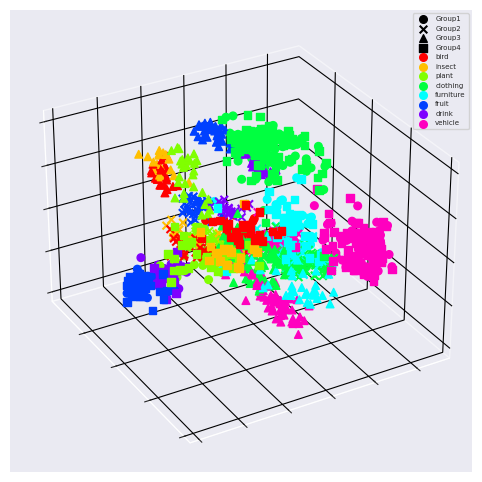

In [ ]:
# Set color labels and category data if exist.
if data_select == "THINGS":
    category_name_list = ["bird", "insect", "plant", "clothing",  "furniture", "fruit", "drink", "vehicle"]
    category_mat = pd.read_csv("../data/category_mat_manual_preprocessed.csv", sep = ",", index_col = 0)   
    object_labels, category_idx_list, num_category_list, category_name_list = get_category_data(category_mat, category_name_list, show_numbers = True)  
    
    align_representation.visualize_embedding(
        dim = 3,  
        category_name_list = category_name_list, 
        category_idx_list = category_idx_list, 
        num_category_list = num_category_list,
    )